In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns

from prfpy_csenf.model import CSenFModel
from prfpy_csenf.stimulus import CSenFStimulus
from prfpy_csenf.fit import CSenFFitter
from prfpy_csenf.rf import csenf_exponential

import seaborn as sns    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/daghlian/.conda/envs/dag_mcmc/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


### Load stimulus settings 

In [2]:
# COPIED AND PASTED FROM EXPERIMENT PARAMETERS...
# Load stimulus parameters. 
# 6 SF levels (sfs_level)
# 14 contrast levels (con_level)
sfs_level = np.array([ 0.5,  1.,   3.,   6.,  12.,  18. ] )
con_level = np.array([ 0.25,     0.38962,  0.60722,  0.94635,  1.4749,   2.2986,   3.5823,   5.583, 8.701,   13.56,    21.134,   32.937,   51.332,   80.     ])
# Sequence of SFs and contrast levels (214 steps)
sfs_seq = np.array([
    0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,3.0  ,
    3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,
    18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,
    18.0 ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,
    1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,
    1.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,
    6.0  ,6.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,
    0.0  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,
    0.5  ,0.5  ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,
    12.0 ,12.0 ,12.0 ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,
    0.0  ,0.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,
    6.0  ,6.0  ,6.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,
    1.0  ,1.0  ,1.0  ,1.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,
    0.0  ,0.0  ,0.0  ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,
    12.0 ,12.0 ,12.0 ,12.0 ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,
    3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,
    0.0  ,0.0  ,0.0  ,0.0  ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,
    18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,
    0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,
    0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,])

con_seq = np.array([
    0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,80.0      ,
    32.937    ,13.56     ,8.701     ,5.583     ,3.5823    ,2.2986    ,1.4749    ,0.94635   ,0.60722   ,0.38962   ,0.25      ,
    0.25      ,0.60722   ,1.4749    ,2.2986    ,3.5823    ,5.583     ,8.701     ,13.56     ,21.134    ,32.937    ,51.332    ,
    80.0      ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,
    80.0      ,32.937    ,13.56     ,8.701     ,5.583     ,3.5823    ,2.2986    ,1.4749    ,0.94635   ,0.60722   ,0.38962   ,
    0.25      ,0.25      ,0.60722   ,0.94635   ,1.4749    ,2.2986    ,3.5823    ,5.583     ,8.701     ,13.56     ,21.134    ,
    32.937    ,80.0      ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,
    0.0       ,80.0      ,32.937    ,13.56     ,8.701     ,5.583     ,3.5823    ,2.2986    ,1.4749    ,0.94635   ,0.60722   ,
    0.38962   ,0.25      ,0.25      ,0.60722   ,1.4749    ,2.2986    ,3.5823    ,5.583     ,8.701     ,13.56     ,21.134    ,
    32.937    ,51.332    ,80.0      ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,
    0.0       ,0.0       ,80.0      ,32.937    ,21.134    ,13.56     ,8.701     ,5.583     ,3.5823    ,2.2986    ,1.4749    ,
    0.94635   ,0.60722   ,0.25      ,0.25      ,0.38962   ,0.60722   ,0.94635   ,1.4749    ,2.2986    ,3.5823    ,5.583     ,
    8.701     ,13.56     ,32.937    ,80.0      ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,
    0.0       ,0.0       ,0.0       ,80.0      ,51.332    ,32.937    ,21.134    ,13.56     ,8.701     ,5.583     ,3.5823    ,
    2.2986    ,1.4749    ,0.60722   ,0.25      ,0.25      ,0.38962   ,0.60722   ,0.94635   ,1.4749    ,2.2986    ,3.5823    ,
    5.583     ,8.701     ,13.56     ,32.937    ,80.0      ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,
    0.0       ,0.0       ,0.0       ,0.0       ,80.0      ,51.332    ,32.937    ,21.134    ,13.56     ,8.701     ,5.583     ,
    3.5823    ,2.2986    ,1.4749    ,0.60722   ,0.25      ,0.25      ,0.38962   ,0.60722   ,0.94635   ,1.4749    ,2.2986    ,
    3.5823    ,5.583     ,8.701     ,13.56     ,32.937    ,80.0      ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,
    0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,])

# Store the indices of the parameters in the parameter vector
csf_param_idx = {
    'width_r'   : 0,
    'sf0'       : 1,
    'maxC'      : 2,
    'width_l'   : 3,
    'crf_exp'   : 4,
    'beta'      : 5,
    'baseline'  : 6,
    'hrf_1'     : 7,
    'hrf_2'     : 8,
    'rsq'       : 9,
    }

# PRFPY stimulus
csenf_stim = CSenFStimulus(
    SFs     = sfs_level,
    CONs    = con_level,
    SF_seq  = sfs_seq,
    CON_seq = con_seq,
    TR      = 1.5,
    )

csenf_model = CSenFModel(stimulus = csenf_stim)

/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/stimulus.py:252: RuntimeWarning: divide by zero encountered in log10
  self.log_SF_seq = np.log10(SF_seq)
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/stimulus.py:254: RuntimeWarning: divide by zero encountered in true_divide
  self.CON_S_seq = 100/CON_seq


/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/model.py:991: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':


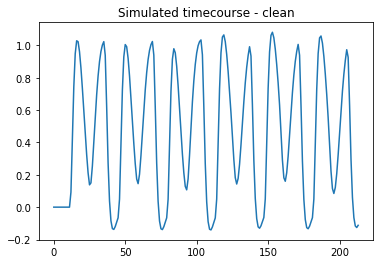

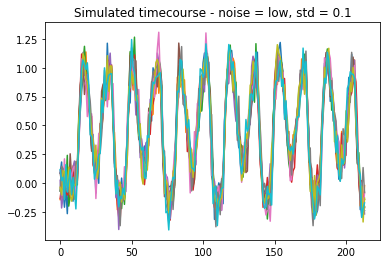

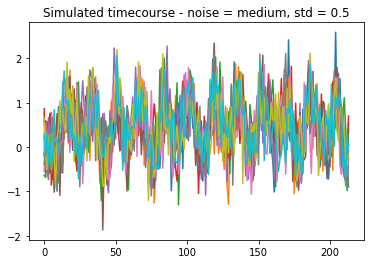

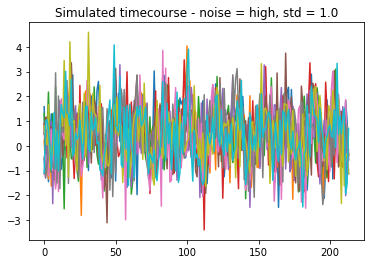

In [3]:
ground_truth_params = {
    'width_r' : np.array([1.0]),
    'sf0'     : np.array([6.0]),
    'maxC'    : np.array([100.0]),
    'width_l' : np.array([0.448]),
    'crf_exp' : np.array([1]),
    'beta'    : np.array([1]),
    'baseline': np.array([0]),
    'hrf_1'   : np.array([1]),
    'hrf_2'   : np.array([0]),
}
        
sim_tc = csenf_model.return_prediction(**ground_truth_params)
plt.figure()
plt.title('Simulated timecourse - clean')
plt.plot(sim_tc.T)


n_timepoints = sim_tc.shape[-1]
g_noise_levels = {
    'low': 0.1,
    'medium': 0.5,
    'high': 1.0}

n_noisy_samples = 10
noisy_sim_tc = {}
for g_noise_label,g_noise_value in g_noise_levels.items():
    g_noise = np.random.normal(0, g_noise_value, (n_noisy_samples, n_timepoints))    
    noisy_sim_tc[g_noise_label] = sim_tc + g_noise

    plt.figure()
    plt.title(f'Simulated timecourse - noise = {g_noise_label}, std = {g_noise_value}')
    plt.plot(noisy_sim_tc[g_noise_label].T)

### Fit the noisy simulated data

In [4]:

# [1] Setup bounds:
bounds = {
    'width_r'   : [0,5],
    'sf0'       : [0, 18],
    'maxC'      : [0, 200], 
    'width_l'   : [0.448, 0.448],
    'crf_exp'   : [0, 10], # ???
    'beta'      : [0, 1000],
    'baseline'  : [-5,5], 
    'hrf_1'     : [1, 1],
    'hrf_2'     : [0,0],
}

# [2] Setup grids:
grid_nr = 20 # number of steps in grid
width_r_grid   = np.linspace(bounds['width_r'][0], bounds['width_r'][1], grid_nr)     
sf0_grid   = np.linspace(bounds['sf0'][0], bounds['sf0'][1], grid_nr)     
maxC_grid = np.linspace(bounds['maxC'][0], bounds['maxC'][1], grid_nr)
width_l_grid   = np.array(bounds['width_l'][0])
crf_exp_grid   = np.linspace(bounds['crf_exp'][0], bounds['crf_exp'][1], grid_nr)
hrf_1_grid = None
hrf_2_grid = None
# -> & grid bounds
csf_grid_bounds = [bounds['beta']]

# [3] Setup iterative bounds
bounds_list = [
    (bounds['width_r']),     # width_r
    (bounds['sf0']),     # sf0
    (bounds['maxC']),    # maxC
    (bounds['width_l']),     # width_l
    (bounds['crf_exp']),     # width_l
    (bounds['beta']),   # beta
    (bounds['baseline']),      # baseline
    (bounds['hrf_1']),      # baseline
    (bounds['hrf_2']),      # baseline
]
# -> Constraints determines which scipy fitter is used
csf_constraints = None   # None -> bgfs, [] -> TC



In [5]:
# [4] Loop through noise levels and fit simulated data
recovered_params = {}
for g_noise_label in g_noise_levels.keys():

    # Make fitter object
    csenf_fitter = CSenFFitter(
        data    = noisy_sim_tc[g_noise_label],
        model   = csenf_model,
        fit_hrf = True,
        n_jobs=10,
    )
    # Start grid fit
    csenf_fitter.grid_fit(
        width_r_grid    = width_r_grid,
        sf0_grid        = sf0_grid,
        maxC_grid       = maxC_grid,
        width_l_grid    = width_l_grid,
        crf_exp_grid    = crf_exp_grid,
        hrf_1_grid      = hrf_1_grid,
        hrf_2_grid      = hrf_2_grid,
        verbose         = True,
        fixed_grid_baseline=True,
        grid_bounds=csf_grid_bounds, 
        n_batches=10,
    )
    
    # Start iterative fit
    csenf_fitter.iterative_fit(
        rsq_threshold = 0.1,            
        verbose = False,
        bounds = bounds_list,
        constraints = csf_constraints,
        xtol=0.001,   
        ftol=0.001,           
        )

    # # Store recovered parameters in dict
    recovered_params[g_noise_label] = csenf_fitter.iterative_search_params
    

/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/model.py:926: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  prediction_params = np.array([width_r,
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/rf.py:230: RuntimeWarning: divide by zero encountered in log10
  log_sf0 = np.log10(sf0)
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/rf.py:231: RuntimeWarning: divide by zero encountered in log10
  log_maxC = np.log10(maxC)
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/rf.py:248: RuntimeWarning: invalid value encountered in multiply
  R_curve = 10**(log_maxC - ((log_sfs_gr-log_sf0)**2) * (width_r**2))
/data1/projects/dumoulinlab/Lab_members/Marc

Each batch contains approx. 1 voxels.


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: divide by zero encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: invalid value encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: divide by zero encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: invalid value encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/pr

Each batch contains approx. 1 voxels.


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: divide by zero encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: invalid value encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: divide by zero encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: invalid value encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/pr

Each batch contains approx. 1 voxels.


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: divide by zero encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: invalid value encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: divide by zero encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: invalid value encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/pr

In [9]:
# Put recovered params in a convenient dictionary format

reco_params_dict = {}

for g_noise_label in ['clean', 'low', 'medium', 'high']:
    reco_params_dict[g_noise_label] = {}

    # Get input parmaters:
    if g_noise_label == 'clean':
        # Named parameters 
        width_r     = ground_truth_params['width_r']
        sf0         = ground_truth_params['sf0']
        maxC        = ground_truth_params['maxC']
        width_l     = ground_truth_params['width_l']
        crf_exp     = ground_truth_params['crf_exp']
        beta        = ground_truth_params['beta']
        baseline    = ground_truth_params['baseline']
        hrf_1       = ground_truth_params['hrf_1']
        hrf_2       = ground_truth_params['hrf_2']
        rsq         = np.array([1.0])

    else:
        width_r     = recovered_params[g_noise_label][:, csf_param_idx['width_r']]
        sf0         = recovered_params[g_noise_label][:, csf_param_idx['sf0']]
        maxC        = recovered_params[g_noise_label][:, csf_param_idx['maxC']]
        width_l     = recovered_params[g_noise_label][:, csf_param_idx['width_l']]
        crf_exp     = recovered_params[g_noise_label][:, csf_param_idx['crf_exp']]
        beta        = recovered_params[g_noise_label][:, csf_param_idx['beta']]
        baseline    = recovered_params[g_noise_label][:, csf_param_idx['baseline']]
        hrf_1       = recovered_params[g_noise_label][:, csf_param_idx['hrf_1']]
        hrf_2       = recovered_params[g_noise_label][:, csf_param_idx['hrf_2']]
        rsq         = recovered_params[g_noise_label][:, csf_param_idx['rsq']]

    # Calculate log10 versions of parameters
    log10_sf0   = np.log10(sf0)
    log10_maxC  = np.log10(maxC)

    # Calculate CSF curves + matrix 
    csf_mat, csf_curve = csenf_exponential(
        log_SF_grid = csenf_stim.log_SF_grid, 
        CON_S_grid  = csenf_stim.CON_S_grid,
        width_r     = width_r, 
        sf0         = sf0, 
        maxC        = maxC, 
        width_l     = width_l, 
        crf_exp     = crf_exp,
        return_curve=True,
        )    
    
    # Log CSF curve
    logcsf_curve = np.log10(csf_curve)    
    logcsf_curve[logcsf_curve<0 ] = 0
    
    # Calculate AULCSF (area under log CSF)
    aulcsf = np.trapz(logcsf_curve, x=np.log10(sfs_level), axis=0)

    # Calculate sfmax
    # sfmax = 10.^((sqrt((maxC)./(width_r.^2)) + peak_sf)); % exp 
    sfmax = ((np.sqrt(log10_maxC)/(width_r**2) + log10_sf0))
    sfmax = np.nan_to_num(sfmax)

    reco_params_dict[g_noise_label]['width_r'] = width_r.copy()    
    reco_params_dict[g_noise_label]['sf0'] = sf0.copy()
    reco_params_dict[g_noise_label]['log10_sf0'] = log10_sf0.copy()
    reco_params_dict[g_noise_label]['maxC'] = maxC.copy()
    reco_params_dict[g_noise_label]['log10_maxC'] = log10_maxC.copy()
    reco_params_dict[g_noise_label]['width_l'] = width_l.copy()
    reco_params_dict[g_noise_label]['crf_exp'] = crf_exp.copy()
    reco_params_dict[g_noise_label]['beta'] = beta.copy()
    reco_params_dict[g_noise_label]['baseline'] = baseline.copy()
    reco_params_dict[g_noise_label]['hrf_1'] = hrf_1.copy()
    reco_params_dict[g_noise_label]['hrf_2'] = hrf_2.copy()
    reco_params_dict[g_noise_label]['rsq'] = rsq.copy()
    reco_params_dict[g_noise_label]['aulcsf'] = aulcsf.copy()
    reco_params_dict[g_noise_label]['sfmax'] = sfmax.copy()
    reco_params_dict[g_noise_label]['csf_curve'] = csf_curve.copy()
    reco_params_dict[g_noise_label]['logcsf_curve'] = logcsf_curve.copy()
    reco_params_dict[g_noise_label]['csf_mat'] = csf_mat.copy()
    # 




(array([7., 0., 0., 2., 0., 0., 0., 0., 0., 1.]),
 array([1.11902976e+00, 3.64858025e+02, 7.28597020e+02, 1.09233601e+03,
        1.45607501e+03, 1.81981400e+03, 2.18355300e+03, 2.54729199e+03,
        2.91103099e+03, 3.27476998e+03, 3.63850898e+03]),
 <BarContainer object of 10 artists>)

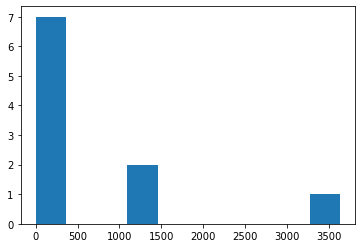

In [ ]:
# [5] Plot recovered parameters compare with ground truth
params_to_plot = ['width_r', 'sf0', 'maxC', 'crf_exp', 'aulcsf']#, 'sfmax']
fig, ax = plt.subplots(1, len(params_to_plot), figsize=(25,7))
# Add suptitle with mean rsq
low_mrsq = np.mean(reco_params_dict['low']['rsq'])
med_mrsq = np.mean(reco_params_dict['medium']['rsq'])
high_mrsq = np.mean(reco_params_dict['high']['rsq'])
# - make sure it doesn't overlap with the plots
fig.subplots_adjust(top=0.85)
fig.suptitle(f'Low noise mean rsq = {low_mrsq:.2f}\nMedium noise mean rsq = {med_mrsq:.2f}\nHigh noise mean rsq = {high_mrsq:.2f}')
for iP,param in enumerate(params_to_plot):    
    # Boxplot of {param}, split by noise level, using seaborn

    # ax[iP].boxplot(
    #     [reco_params_dict[g_noise_label][param] for g_noise_label in g_noise_levels.keys()],
    #     labels = g_noise_levels.keys(),
    #     )
    # Now using seaborn
    sns.swarmplot(
        data = [reco_params_dict[g_noise_label][param] for g_noise_label in g_noise_levels.keys()],
        ax = ax[iP],
        )
    ax[iP].set_title(param)
    ax[iP].set_xlabel(f'Noise level')        
    ax[iP].axhline(ground_truth_params[param], color='k', linestyle='--')


In [ ]:
# [6] Plot CSF curves
sns.set_theme()
fig, ax = plt.subplots(1, 1, figsize=(10,7))
# Add suptitle with mean rsq
low_mrsq = np.mean(reco_params_dict['low']['rsq'])
med_mrsq = np.mean(reco_params_dict['medium']['rsq'])
high_mrsq = np.mean(reco_params_dict['high']['rsq'])
# - make sure it doesn't overlap with the plots
fig.subplots_adjust(top=0.85)
fig.suptitle(f'Low noise mean rsq = {low_mrsq:.2f}\nMedium noise mean rsq = {med_mrsq:.2f}\nHigh noise mean rsq = {high_mrsq:.2f}')
# Setup the axis
ax.set_title('CSF curves')
ax.set_xlabel('log10 SF')
ax.set_ylabel('?')
ax.set_xscale('log')
ax.set_yscale('log')

# Plot ground truth -> thick green line
ax.plot(
    sfs_level, 
    csf_curves['clean'], 
    color='g', linewidth=3, label='Ground truth')

ax.scatter(0,0)
# Plot recovered curves
for g_noise_label in g_noise_levels.keys():
    logCSF = np.log10(csf_curves[g_noise_label])
    logCSF[logCSF<1 ] = 1
    ax.plot(
        sfs_level, 
        csf_curves[g_noise_label], 
        label=f'{g_noise_label} noise',
        alpha=0.1,
        color='k'
        )
    break

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
for p in ['width_r', 'sf0', 'maxC', 'width_l']:
    ax[0].plot(csenf_fitter.iter_[p], label=p)

In [ ]:
grid_params = csenf_fitter.gridsearch_params
csf_param_idx = {
    'width_r'   : 0,
    'sf0'       : 1,
    'maxC'      : 2,
    'width_l'   : 3,
    'crf_exp'   : 4,
    'beta'      : 5,
    'baseline'  : 6,
    'hrf_1'     : 7,
    'hrf_2'     : 8,
    'rsq'       : 9,
    }
for key in csf_param_idx.keys():
    print(f'{key}: {np.nanmean(grid_params[:,csf_param_idx[key]]):.3f}')


In [ ]:
csf_rfs, csf_curve = csenf_exponential(
    log_SF_grid = csenf_stim.log_SF_grid, 
    CON_S_grid  = csenf_stim.CON_S_grid,
    width_r     = grid_params[:,csf_param_idx['width_r']], 
    sf0         = grid_params[:,csf_param_idx['sf0']], 
    maxC        = grid_params[:,csf_param_idx['maxC']], 
    width_l     = grid_params[:,csf_param_idx['width_l']], 
    crf_exp     = grid_params[:,csf_param_idx['crf_exp']],
    return_curve=True,
    )

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(5, 5)
ax = plt.gca()
ax.set_title('CSF - simulations')
ax.set_xlabel('log10(SF)')
ax.set_ylabel('log10(CON)')
ax.set_aspect('equal')
ax.set_xscale('log')
ax.set_yscale('log')
# Plot the 'TRUE CSF'

# ax.set_xticks(np.arange(0, len(csenf_stim.SF_grid), 1))
# ax.set_xticklabels(csenf_stim.SF_grid)